In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(palette='rocket')
sns.color_palette("rocket", 8)

[(0.16342174, 0.0851396, 0.21088893),
 (0.33067031, 0.11701189, 0.30632563),
 (0.51728314, 0.1179558, 0.35453252),
 (0.70457834, 0.0882129, 0.34473046),
 (0.86641628, 0.17387796, 0.27070818),
 (0.94291042, 0.37549479, 0.26369821),
 (0.96173392, 0.57988594, 0.41844491),
 (0.96656022, 0.75658231, 0.62527295)]

In [3]:
df = pd.read_csv("./data/Titanic-dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#df = df.replace(0, np.nan).dropna()
df = df.drop('Name', axis =1)
df = df.drop('Ticket', axis =1)
df[['cabin letter', 'cabin number']] = df['Cabin'].str.extract(r'([A-Za-z]+)(\d+)')
df = df.drop('Cabin', axis =1)
df['Sex'] = df['Sex'].replace({'female':1,'male':2})
df['cabin letter'] = df['cabin letter'].replace({'a':1,'b':2, 'c':3, 'd':4})
df = df.drop('Embarked', axis =1)
df = df.drop('cabin letter', axis =1)
df = df.drop('Fare', axis=1)
df = df.drop('Parch', axis = 1)
df = df.drop('SibSp', axis=1)
df['cabin number'] = df['cabin number'].astype(float)
age_bins = np.arange(0, 100, 10)
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
column = df.pop('Survived')
df['Survived'] = column

df

,PassengerId,Pclass,Sex,Age,cabin number,Age Group,Survived
0,1,3,2,22.0,NaN,20-29,0
1,2,1,1,38.0,85.0,30-39,1
2,3,3,1,26.0,NaN,20-29,1
3,4,1,1,35.0,123.0,30-39,1
4,5,3,2,35.0,NaN,30-39,0
...,...,...,...,...,...,...,...
886,887,2,2,27.0,NaN,20-29,0
887,888,1,1,19.0,42.0,10-19,1
888,889,3,1,NaN,NaN,NaN,0
889,890,1,2,26.0,148.0,20-29,1


## Survival by Age

In [5]:
age_bins = np.arange(0, 100, 10)
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
age_grouped = df.groupby(['Age Group', 'Survived']).size().unstack(fill_value=0) 
age_grouped

Survived,0,1
Age Group,,
0-9,24,38
10-19,61,41
20-29,143,77
30-39,94,73
40-49,55,34
50-59,28,20
60-69,13,6
70-79,6,0
80-89,0,1


In [6]:
# Get counts for survived (Survived == 1) and not survived (Survived == 0)
age_survived = age_grouped[1]
age_died = age_grouped[0] 
print(age_survived)
print(type(age_survived))

Age Group
0-9      38
10-19    41
20-29    77
30-39    73
40-49    34
50-59    20
60-69     6
70-79     0
80-89     1
Name: 1, dtype: int64
<class 'pandas.core.series.Series'>


In [7]:
x = np.arange(len(age_labels))  # The x locations for the age groups
width = 0.35  # Width of the bars
print(x)

[0 1 2 3 4 5 6 7 8]


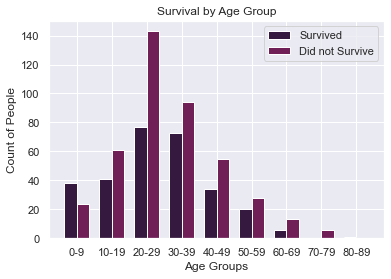

In [10]:
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, age_survived, width, label='Survived')
bar2 = ax.bar(x + width/2, age_died, width, label='Did not Survive')

ax.set_xlabel('Age Groups')
ax.set_ylabel('Count of People')
ax.set_title('Survival by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(age_labels)
ax.legend()

plt.show()

## Gender

In [11]:
gender_labels = ['male','female']

In [12]:
gender_grouped = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0) 

gender_survived_counts = gender_grouped[1]
gender_died_counts = gender_grouped[0] 
print(gender_survived_counts)
print(gender_died_counts)

Sex
1    233
2    109
Name: 1, dtype: int64
Sex
1     81
2    468
Name: 0, dtype: int64


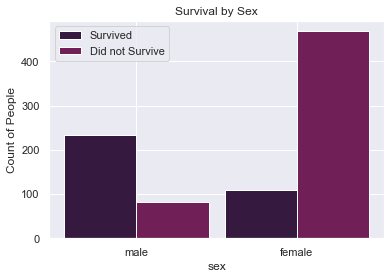

In [13]:
x = np.arange(len(gender_labels)) 
width = 0.45

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, gender_survived_counts, width, label='Survived')
bar2 = ax.bar(x + width/2, gender_died_counts, width, label='Did not Survive')

# Add labels, title, and custom ticks
ax.set_xlabel('sex')
ax.set_ylabel('Count of People')
ax.set_title('Survival by Sex')
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)
ax.legend()

plt.show()

## Class

In [14]:
class_labels = ['1','2','3']
class_grouped = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0) 

class_survived_counts = class_grouped[1]
class_died_counts = class_grouped[0] 
print(class_survived_counts)
print(class_died_counts)

Pclass
1    136
2     87
3    119
Name: 1, dtype: int64
Pclass
1     80
2     97
3    372
Name: 0, dtype: int64


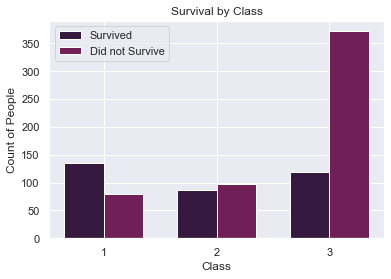

In [15]:
x = np.arange(len(class_labels)) 
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, class_survived_counts, width, label='Survived')
bar2 = ax.bar(x + width/2, class_died_counts, width, label='Did not Survive')

# Add labels, title, and custom ticks
ax.set_xlabel('Class')
ax.set_ylabel('Count of People')
ax.set_title('Survival by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.show()

## Survival by Cabin Number

In [21]:
cabin_bins = np.array([0,37,74,111,148])
cabin_labels = np.array([37,74,111,148])

In [17]:
df['Cabin Group'] = pd.cut(df['cabin number'], bins=cabin_bins, right=True)
df['Cabin Group']

0                 NaN
1       (74.0, 111.0]
2                 NaN
3      (111.0, 148.0]
4                 NaN
            ...      
886               NaN
887      (37.0, 74.0]
888               NaN
889    (111.0, 148.0]
890               NaN
Name: Cabin Group, Length: 891, dtype: category
Categories (4, interval[int64, right]): [(0, 37] < (37, 74] < (74, 111] < (111, 148]]

In [18]:
cabin_grouped = df.groupby(['Cabin Group', 'Survived']).size().unstack(fill_value=0)
cabin_grouped

Survived,0,1
Cabin Group,,
"(0, 37]",26,67
"(37, 74]",21,33
"(74, 111]",14,26
"(111, 148]",5,8


In [19]:
# Get counts for survived (Survived == 1) and not survived (Survived == 0)
cabin_survived = cabin_grouped[1]
cabin_died = cabin_grouped[0] 

C:\Users\kasey\AppData\Local\Temp\ipykernel_44888\2331312152.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cabin_labels)


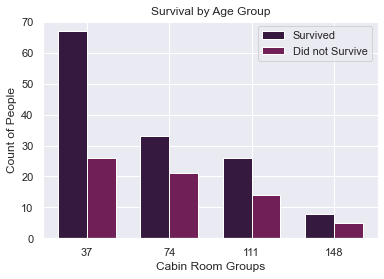

In [22]:
x = np.arange(len(cabin_labels)) 
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, cabin_survived, width, label='Survived')
# Plot for Did not Survive
bar2 = ax.bar(x + width/2, cabin_died, width, label='Did not Survive')

# Add labels, title, and custom ticks
ax.set_xlabel('Cabin Room Groups')
ax.set_ylabel('Count of People')
ax.set_title('Survival by Age Group')
ax.set_xticklabels(cabin_labels)
ax.set_xticks(x)
ax.legend()

plt.show()